# 项目：泰坦尼克数据集探索
## 一、数据集信息描述
&emsp;&emsp;该部分介绍了*titanic-data.csv*数据集的基本信息，你还可以在[Kaggle主页](https://www.kaggle.com/c/titanic/data)查看关于该数据集的更多详细介绍，这里只是简单介绍了各列的基本信息和取值类型：  
**PassengerId**：乘客ID，乘客的唯一标识符  
**Survived**： 是否生存，（0=No,1=Yes）  
**Pclass**：船票等级，（1 = 1st, 2 = 2nd, 3 = 3rd）  
**Name**：乘客姓名  
**Sex**：乘客性别  
**Age**：乘客年龄  
**SibSp**：兄弟姐妹或配偶在船上的人数  
**Parch**：父母或子女在船上的人数  
**Ticket**：票号  
**Fare**：旅客票价  
**Cabin**：房间号  
**Embarked**：出发港（C = Cherbourg, Q = Queenstown, S = Southampton）

## 二、探索问题
**探索问题1：**生存率和性别是否有关，是不是女性的生存率要比男性的生存率高？  
**探索问题2：**生存率和年龄是否有关，是不是年纪小的儿童生存率要更高？  
**探索问题3：**生存率和乘客的船票等级或乘客的票价是否有关，是不是头等舱的乘客生存几率越大？

## 三、数据整理与分析
### 1、数据整理
&emsp;&emsp;先从原始文件中读取数据，分别取出生存乘客和死亡乘客的数据

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'titanic-data.csv'
passenger_df = pd.read_csv(filename)
passenger_df.head()
passenger_df.describe()
# print passenger_df['Survived']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
#通过观察发现只有Age列的数量位714，少于其他列的数量891，说明Age列有空值，这里我打算用Age()列的平均值来填充
mean_age = passenger_df['Age'].mean()
passenger_df['Age'].fillna(mean_age, inplace = True)
# passenger_df.describe()

#此外为了后续分析，这里我将年龄分组0-12,12-20,20-60,60-80，增加了Age_group列来区分不同年龄段的乘客
bin_size=[0,12,20,60,80]
mlables = ['children','teenager','adult','agedness']
passenger_df['Age_group'] = pd.cut(passenger_df['Age'],bin_size,labels = mlables)
passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [84]:
#生存乘客的数据保存到survived_passenger_df中
survived_passenger_df = passenger_df[passenger_df['Survived'] == 1]
survived_passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,teenager


In [86]:
#非生存乘客的数据保存到not_survived_passenger_df中
not_survived_passenger_df = passenger_df[passenger_df['Survived'] == 0]
not_survived_passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,children


### 2、探索数据集并分析问题
#### 2.1：生存率和性别的关系
&emsp;&emsp;由于在电影中我们看到最终很多男士将乘坐救生艇的机会让给了女士，所以，这里我猜测女士的生存率较男士要高。

In [87]:
# #先从原始数据中分别统计男士和女士的人数
# all_passenger_num = passenger_df['Sex'].count()
# male_passenger_num = passenger_df[passenger_df['Sex'] == 'male']['Sex'].count()
# female_passenger_num = passenger_df[passenger_df['Sex'] == 'female']['Sex'].count()
# print "all_passenger_num: " + str(all_passenger_num)
# print "male_passenger_num: " + str(male_passenger_num)
# print "female_passenger_num: " + str(female_passenger_num)
# #再从生还者数据集中分别统计男士和女士的人数
# all_survived_passenger_num = survived_passenger_df['Sex'].count()
# male_survived_passenger_num = survived_passenger_df[survived_passenger_df['Sex'] == 'male']['Sex'].count()
# female_survived_passenger_num = survived_passenger_df[survived_passenger_df['Sex'] == 'female']['Sex'].count()
# print "all_survived_passenger_num: " + str(all_survived_passenger_num)
# print "male_survived_passenger_num: " + str(male_survived_passenger_num)
# print "female_survived_passenger_num: " + str(female_survived_passenger_num)

# #计算乘客生存率，男性乘客生存率以及女性乘客的生存率
# survived_rate = (all_survived_passenger_num*1.0)/all_passenger_num
# male_survived_rate = (male_survived_passenger_num*1.0)/male_passenger_num
# female_survived_rate = (female_survived_passenger_num*1.0)/female_passenger_num
# print "survived_rate: {}".format(survived_rate)
# print "male_survived_rate: {}".format(male_survived_rate)
# print "female_survived_rate: {}".format(female_survived_rate)
#统计总人数中的男女人数
print "total male&female passengers numbers:"
print passenger_df.groupby('Sex')['PassengerId'].count()

#分别统计生还和死亡人数中的男女人数
print "total survived or dead male&female passengers numbers:"
print passenger_df.groupby(['Survived','Sex'])['PassengerId'].count()

#统计总乘客的幸存率
print "the survived rate of passengers:"
print passenger_df['Survived'].mean()

#统计男性和女性的幸存率
print "the survived rate of male&female passengers:"
print passenger_df.groupby('Sex')['Survived'].mean()

total male&female passengers numbers:
Sex
female    314
male      577
Name: PassengerId, dtype: int64
total survived or dead male&female passengers numbers:
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64
the survived rate of passengers:
0.383838383838
the survived rate of male&female passengers:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


&emsp;&emsp;从上面的结果可以看出，乘客的总数是891人，其中男性乘客有577人，女性有314人；生存人数总数有342人，而其中男性乘客有109人，女性有233人。总乘客的生存率有大约38%，而男性乘客的生存率仅约为19%，女性乘客的生存率则约为74%。所以这里女性的生存率确实要高于男性乘客。

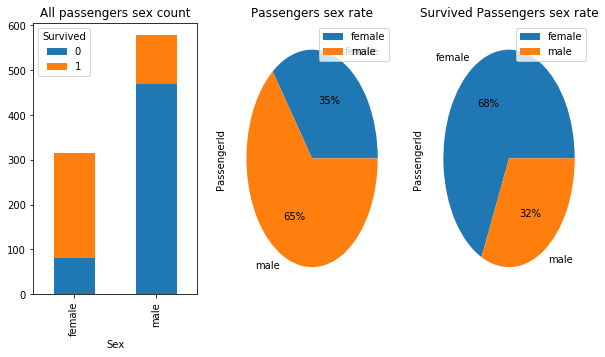

In [98]:
#利用图形的形式展示乘客中男女比例的数量
#图1展示了所以乘客中男性和女性的数量
# plt.figure(figsize=(10,3))
# plt.subplot(131)
# sns.countplot(x='Sex', data=passenger_df,hue = 'Survived')
# # plt.legend(labels = ['Male','Female'], loc = 'upper right') #只能显示一个Male图例,无法正常显示Female图例，为什么？
# plt.title('All passengers sex count')
fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot(1,3,1)
passenger_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(ax = fig.add_subplot(1,3,1) ,kind = 'bar', stacked = True, title='All passengers sex count')

# #图2展示了所以乘客中男性和女性的比例
# plt.subplot(132)
# plt.pie([male_passenger_num, female_passenger_num],labels=['Male','Female'],autopct='%1.0f%%')
# # plt.legend(labels = ['Male','Famale'],loc = 'upper right')
# plt.legend(loc = 'upper right') 
# plt.title('Passengers sex rate') 
passenger_df.groupby('Sex')['PassengerId'].count().plot(ax = fig.add_subplot(1,3,2), kind = 'pie',autopct = '%1.0f%%',title='Passengers sex rate')
plt.legend()
# # #图4展示了生还乘客中男性和女性的比例
# plt.subplot(133)
# plt.pie([male_survived_passenger_num, female_survived_passenger_num],labels=['Survived male','Survived female'],autopct='%1.0f%%')
# plt.legend(loc = 'lower right')
# plt.title('Survived passengers sex rate') 
survived_passenger_df.groupby('Sex')['PassengerId'].count().plot(ax = fig.add_subplot(1,3,3), kind = 'pie',autopct = '%1.0f%%',title='Survived Passengers sex rate')
plt.legend()

&emsp;&emsp;利用图形能更清晰直观地描述数据，如图一总人数条形图中，男性乘客总数明显多于女性乘客，而生存的男性乘客的数量却要远小于女性乘客的数量。在图二的饼图中能清楚地知道男女占总人数的比例；在图三中可以明确地知道生存的男女人数在生存总人数中的比例。综上所述，女性的生存率确实要高于男性。

#### 2.2 生存率和年龄的关系
&emsp;&emsp;在电影中我们看到大部分乘客将生存机会让给了年幼的乘客，这里我利用相关数据进行了一些简单分析

passengers max age is:80.0
passengers min age is:0.42
passengers mean age is:29.6991176471


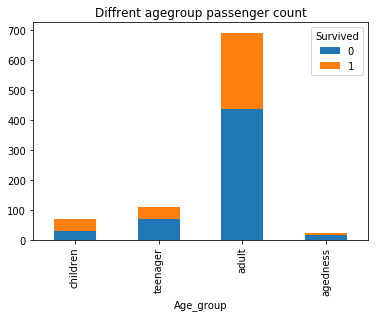

In [89]:
#首先确定年龄范围
print "passengers max age is:{}".format(passenger_df['Age'].max())
print "passengers min age is:{}".format(passenger_df['Age'].min())
print "passengers mean age is:{}".format(passenger_df['Age'].mean())

# passenger_df.head()
#不同年龄段的乘客的分布情况
passenger_df.groupby(['Age_group','Survived'])['Survived'].count().unstack().plot(kind = 'bar',stacked=True,title='Diffrent agegroup passenger count')

&emsp;&emsp;从上面的柱状图可以直观地看出不同年龄段（0-12岁（children），12-20岁(teenager)，20-60岁(adult)以及60-80岁(agedness)）的人数的分布情况，但是不同年龄段的人数还要具体统计计算。

In [90]:
#统计总乘客中不同年龄段的人数，这里我们将年龄段划分为0-12,12-20,20-60,60-80
# children_passenger_num = passenger_df['Age'][passenger_df['Age'] <= 12].count()
# teenager_passenger_num = passenger_df['Age'][(passenger_df['Age'] > 12) & (passenger_df['Age'] <= 20)].count()
# adult_passenger_num = passenger_df['Age'][(passenger_df['Age'] > 20) & (passenger_df['Age'] <= 60)].count()
# agedness_passenger_num = passenger_df['Age'][(passenger_df['Age'] > 60) & (passenger_df['Age'] <= 80)].count()
# print "children_passenger_num: {}".format(children_passenger_num)
# print "teenager_passenger_num: {}".format(teenager_passenger_num)
# print "adult_passenger_num: {}".format(adult_passenger_num)
# print "agedness_passenger_num: {}".format(agedness_passenger_num)

# #统计存活者中的不同年龄段的人数分布
# #由于填充了乘客信息中年龄的确失信息，这里更新了生存者数据
# survived_passenger_df = passenger_df[passenger_df['Survived'] == 1]
# children_survived_num = survived_passenger_df['Age'][survived_passenger_df['Age'] <= 12].count()
# teenager_survived_num = survived_passenger_df['Age'][(survived_passenger_df['Age'] > 12) & (survived_passenger_df['Age'] <= 20)].count()
# adult_survived_num = survived_passenger_df['Age'][(survived_passenger_df['Age'] > 20) & (survived_passenger_df['Age'] <= 60)].count()
# agedness_survived_num = survived_passenger_df['Age'][(survived_passenger_df['Age'] > 60) & (survived_passenger_df['Age'] <= 80)].count()
# print "children_survived_num: {}".format(children_survived_num)
# print "teenager_survived_num: {}".format(teenager_survived_num)
# print "adult_survived_num: {}".format(adult_survived_num)
# print "agedness_survived_num: {}".format(agedness_survived_num)

# #统计不同年龄段的生存率
# children_survived_rate = (children_survived_num*1.0)/children_passenger_num
# teenager_survived_rate = (teenager_survived_num*1.0)/teenager_passenger_num
# adult_survived_rate = (adult_survived_num*1.0)/adult_passenger_num
# agedness_survived_rate = (agedness_survived_num*1.0)/agedness_passenger_num
# print 'children_survived_rate: {}'.format(children_survived_rate)
# print 'teenager_survived_rate: {}'.format(teenager_survived_rate)
# print 'adult_survived_rate: {}'.format(adult_survived_rate)
# print 'agedness_survived_rate: {}'.format(agedness_survived_rate)

#统计总人数中的不同年龄段的人数
print "total age_group passengers numbers:"
print passenger_df.groupby('Age_group')['PassengerId'].count()

#分别统计生还和死亡人数中的男女人数
print "total survived or dead diff age_group passengers numbers:"
print passenger_df.groupby(['Survived','Age_group'])['PassengerId'].count()

#统计总乘客的幸存率
print "the survived rate of passengers:"
print passenger_df['Survived'].mean()

#统计不同年龄段的幸存率
print "the survived rate of diff age_group passengers:"
print passenger_df.groupby('Age_group')['Survived'].mean()

total age_group passengers numbers:
Age_group
children     69
teenager    110
adult       690
agedness     22
Name: PassengerId, dtype: int64
total survived or dead diff age_group passengers numbers:
Survived  Age_group
0         children      29
          teenager      68
          adult        435
          agedness      17
1         children      40
          teenager      42
          adult        255
          agedness       5
Name: PassengerId, dtype: int64
the survived rate of passengers:
0.383838383838
the survived rate of diff age_group passengers:
Age_group
children    0.579710
teenager    0.381818
adult       0.369565
agedness    0.227273
Name: Survived, dtype: float64


&emsp;&emsp;这里我们通过具体的计算统计出了各年龄段的乘客，以及幸存者中各年龄段的人数分布，通过观察发现年纪小于12岁的儿童的生存率最高，约为58%

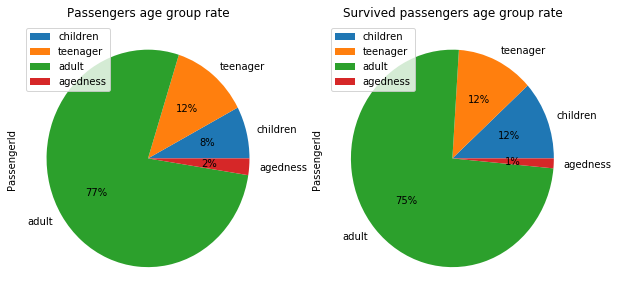

In [97]:
# #图1展示了所有乘客中不同年龄段人数所占的比例
# plt.figure(figsize=(10,5))
# plt.subplot(121)
# plt.pie([children_passenger_num, teenager_passenger_num,adult_passenger_num,agedness_passenger_num],labels=['Children','Teenager','Adult','Agedness'],autopct='%1.0f%%')
# plt.legend(loc = 'upper right') 
# plt.title('Passengers age rate') 
fig = plt.figure(figsize=(10,5))
passenger_df.groupby('Age_group')['PassengerId'].count().plot(ax = fig.add_subplot(1,2,1), kind = 'pie',autopct = '%1.0f%%',title='Passengers age group rate')
plt.legend()
# # #图2展示了生还乘客中不同年龄段人数所占的比例
# plt.subplot(122)
# plt.pie([children_survived_num, teenager_survived_num,adult_survived_num,agedness_survived_num],labels=['Survived children','Survived teenager','Survived adult','Survived agedness'],autopct='%1.0f%%')
# plt.legend(loc = 'lower right')
# plt.title('Survived passengers age rate') 
survived_passenger_df.groupby('Age_group')['PassengerId'].count().plot(ax = fig.add_subplot(1,2,2), kind = 'pie',autopct = '%1.0f%%',title='Survived passengers age group rate')
plt.legend()

&emsp;&emsp;从上图可以看出，不同年龄段的人数分布，在总乘客中和幸存者当中基本相同，但儿童这一年龄段所占的比例由8%提高到12%，相较于其他年龄段的人数占比有明显的提高，所以儿童的生存几率确实更大一些。

#### 2.3生存率和船票等级的关系
&emsp;&emsp;这里我猜测船票等级和生存率相关，尝试分析找出不同船票等级间的生存率的差异

In [99]:
# #统计计算所有乘客中的不同Pcass间的人数
# class1_passenger_num = passenger_df[passenger_df['Pclass'] == 1]['Pclass'].count()
# class2_passenger_num = passenger_df[passenger_df['Pclass'] == 2]['Pclass'].count()
# class3_passenger_num = passenger_df[passenger_df['Pclass'] == 3]['Pclass'].count()
# print "class1_passenger_num: {}".format(class1_passenger_num)
# print "class2_passenger_num: {}".format(class2_passenger_num)
# print "class3_passenger_num: {}".format(class3_passenger_num)

# #统计计算所有生存乘客中的不同Pcass间的人数
# class1_survived_passenger_num = survived_passenger_df[survived_passenger_df['Pclass'] == 1]['Pclass'].count()
# class2_survived_passenger_num = survived_passenger_df[survived_passenger_df['Pclass'] == 2]['Pclass'].count()
# class3_survived_passenger_num = survived_passenger_df[survived_passenger_df['Pclass'] == 3]['Pclass'].count()
# print "class1_survived_passenger_num: {}".format(class1_survived_passenger_num)
# print "class2_survived_passenger_num: {}".format(class2_survived_passenger_num)
# print "class3_survived_passenger_num: {}".format(class3_survived_passenger_num)

# #统计计算不同Pcass间的生存率
# class1_survived_passenger_rate = (class1_survived_passenger_num*1.0)/class1_passenger_num
# class2_survived_passenger_rate = (class2_survived_passenger_num*1.0)/class2_passenger_num
# class3_survived_passenger_rate = (class3_survived_passenger_num*1.0)/class3_passenger_num
# print "class1_survived_passenger_rate: {}".format(class1_survived_passenger_rate)
# print "class2_survived_passenger_rate: {}".format(class2_survived_passenger_rate)
# print "class3_survived_passenger_rate: {}".format(class3_survived_passenger_rate)

#统计总人数中不同Pcass间人数
print "diff class passengers numbers:"
print passenger_df.groupby('Pclass')['PassengerId'].count()

#分别统计生还和死亡人数中的不同Pcass间人数
print "total survived or dead diff class passengers numbers:"
print passenger_df.groupby(['Survived','Pclass'])['PassengerId'].count()

#统计总乘客的幸存率
print "the survived rate of passengers:"
print passenger_df['Survived'].mean()

#统计不同Pcass间的幸存率
print "the survived rate of diff Pclass passengers:"
print passenger_df.groupby('Pclass')['Survived'].mean()

diff class passengers numbers:
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
total survived or dead diff class passengers numbers:
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64
the survived rate of passengers:
0.383838383838
the survived rate of diff Pclass passengers:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


&emsp;&emsp;通过分别计算不同Pclass间的人数，发现在所有乘客中乘坐头等舱的乘客共有216人，乘坐二等舱的乘客有184人，乘坐三等舱的乘客有491人；而在所有的存活者中，头等舱乘客有136人，二等舱乘客有87人，三等舱乘客有119人；头等舱乘客的存活率约为63%，二等舱乘客的存活率约为47%，三等舱乘客的存活率约为24%。显然，不同Pclass等级的乘客的存活率不同，头等舱和二等舱的乘客生存率要远高于三等舱乘客的存活率。

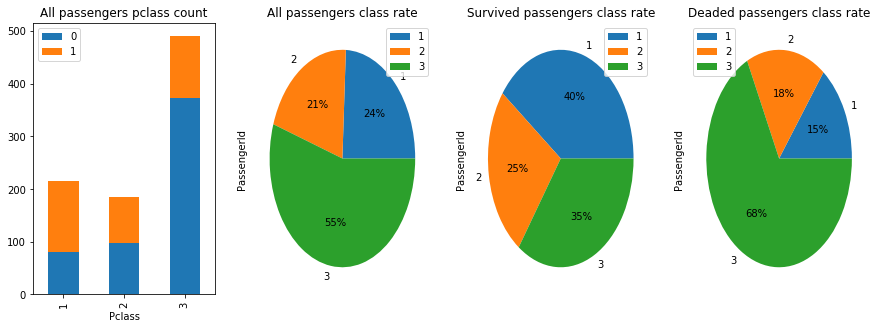

In [100]:
#利用图形的形式展示乘客中男女比例的数量
#图1展示了所以乘客中不同等级乘客（1st,2nd,3rd）的数量
# plt.figure(figsize=(10,5))
# plt.subplot(131)
# sns.countplot(x='Pclass', data=passenger_df, hue='Survived')
# plt.title('All passengers pclass count')
fig = plt.figure(figsize=(15,5))
passenger_df.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(ax = fig.add_subplot(1,4,1) ,kind = 'bar', stacked = True, title='All passengers pclass count')
plt.legend()

#图2展示了所以乘客中不同等级乘客（1st,2nd,3rd）所占的比例
# plt.subplot(132)
# plt.pie([class1_passenger_num, class2_passenger_num, class3_passenger_num],labels=['1st','2nd','3rd'],autopct='%1.0f%%')
# plt.legend(loc = 'upper right') 
# plt.title('All passengers class rate')
passenger_df.groupby('Pclass')['PassengerId'].count().plot(ax = fig.add_subplot(1,4,2), kind = 'pie',autopct = '%1.0f%%',title='All passengers class rate')
plt.legend()

#图3展示了生还乘客中不同等级乘客（1st,2nd,3rd）所占的比例
# plt.subplot(133)
# plt.pie([class1_survived_passenger_num, class2_survived_passenger_num, class3_survived_passenger_num],labels=['1st','2nd','3rd'],autopct='%1.0f%%')
# plt.legend(loc = 'upper right') 
# plt.title('Survived passengers class rate') 
survived_passenger_df.groupby('Pclass')['PassengerId'].count().plot(ax = fig.add_subplot(1,4,3), kind = 'pie',autopct = '%1.0f%%',title='Survived passengers class rate')
plt.legend()
#图4展示了死亡乘客中不同等级乘客（1st,2nd,3rd）所占的比例
not_survived_passenger_df.groupby('Pclass')['PassengerId'].count().plot(ax = fig.add_subplot(1,4,4), kind = 'pie',autopct = '%1.0f%%',title='Deaded passengers class rate')
plt.legend()

&emsp;&emsp;在上述图形中，图一中可以看出不同舱等级的乘客的数量和生还者数量的差异，具体占比可以在饼状图二中看出来，头等舱和二等仓的乘客占比分别约为24%和21%，而三等舱的乘客约占了总乘客人数的55%。图三中可以看出存活乘客中各等级间的人数差异，图四中可以看出不同等级乘客在存活乘客中的占比，头等舱存活乘客占了近40%，二等舱存活乘客占了近25%，三等舱乘客占了35%。这和总乘客中的占比差距较大。较为明显的就是，头等舱和二等舱的乘客相对于三等舱乘客的更有可能存活，此外，我再此还尝试分析了下死亡人数中的不同等级乘客的占比情况,如下图所示，发现死亡的乘客中，三等舱的乘客占的比例最多，这也从另一方面，印证了我们之前的猜想。

## 四、结论
&emsp;&emsp;**针对泰坦尼克号数据集，我主要分析了生存率和性别，年龄及船票等级这三方面的关系，得出以下结论：**  
1、本数据集共有891个乘客的信息，生还人数为342人，生还率约为38%。  
2、在所有乘客中其中男性乘客有577人，女性有314人；生存人数中男性乘客有109人，女性有233人，男性乘客的生存率约为19%，女性乘客的生存率约为74%，所以在本数据集中女性的生存率要高于男性。  
3、在所有乘客中其中儿童乘客（年龄小于12岁）有69人，青年乘客（年龄在12岁和20岁之间）有110人，成年乘客（年龄在20岁和60岁之间）有690人，老年乘客（年龄在60岁和80岁之间）有22人；生存人数中儿童乘客有40人，青年乘客有42人，成年乘客有255人，老年乘客有5人。本数据集中相较于其他年龄段的乘客，儿童的生存率约为58%，是最高的。  
4、在所有乘客中其中头等舱乘客有216人，二等舱乘客有184人，三等舱乘客有491人；生存人数中头等舱乘客有136人，二等舱乘客有87人，三等舱乘客有119人，头等舱乘客的生存率约为63%，二等舱乘客的生存率约为47%，三等舱乘客的生存率约为24%，所以在本数据集中头等舱的生存率是最高的。  
&emsp;&emsp;**分析限制条件：**  
1、该数据集并没有包含全部乘客的信息，据了解，泰坦尼克号全部乘客大概有2224人，而本数据集共有891人，如果这些样本是随机从总人数中选取的，那么，分析的结果具有一定代表性，否则分析结果就不可靠。  
2、在整理数据阶段，由于年龄列有缺失，我利用均值进行了填充，但实际情况很可能和这相差较多，这同样会造成分析偏差。  
3、除了性别，年龄，船票等级这三种因素外，其他列如在出发港，有无配偶子女等，有理由怀疑这些因素也会影响乘客的生存率，除了这些之外，如乘客是否会游泳，相信也会影响乘客的生存率。

### 参考：
1、udacity课程  
2、CSDN，matplotlib的基本用法  
3、https://zhuanlan.zhihu.com/p/26440212  
4、http://www.sohu.com/a/159858714_718302